# Taller 05 Minimos Cuadrados
## Integrantes:
## - Christian Ayala
## - Jhonn Saeteros


## A) Interpole los puntos:
$p_1 = (5.4, 3.2)$<br>
$p2_i = (9.5, 0.7)$<br>
$p_3 = (12.3, -3.6)$<br>
## De estos, el punto $p2_i$ debe ser seleccionable y movible. Cree un programa que interpole una parabola en tiempo real para los tres puntos.

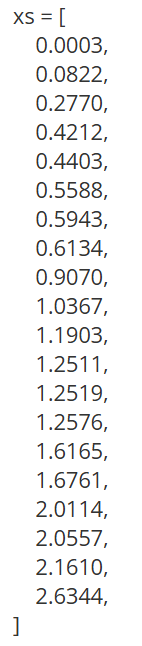
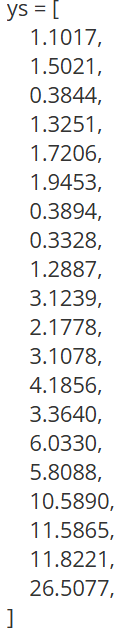

## Implementacion del programa

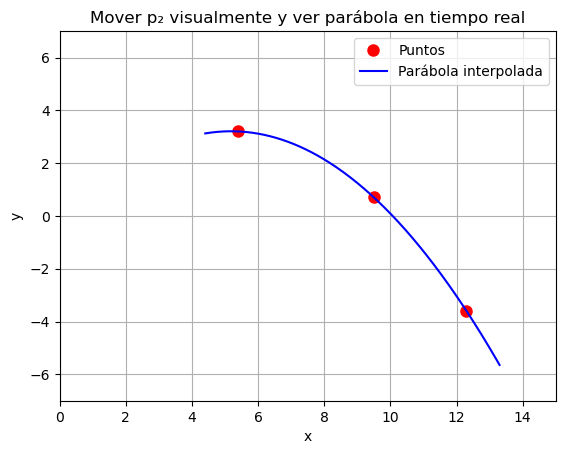

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos iniciales
p1 = [5.4, 3.2]
p2 = [9.5, 0.7]  # <- este será el punto que puedes mover con el mouse
p3 = [12.3, -3.6]

# Crear ventana gráfica
fig, ax = plt.subplots()
ax.set_xlim(0, 15)
ax.set_ylim(-7, 7)
ax.set_title("Mover p₂ visualmente y ver parábola en tiempo real")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True)

# Dibujar los puntos (rojo) y la parábola (azul)
point_plot, = ax.plot(*zip(p1, p2, p3), 'ro', markersize=8, label='Puntos')
curve_plot, = ax.plot([], [], 'b-', label='Parábola interpolada')

# Para saber si estamos arrastrando p2
dragging = False

def actualizar_parabola():
    xs = np.array([p1[0], p2[0], p3[0]])
    ys = np.array([p1[1], p2[1], p3[1]])
    A = np.vstack([xs**2, xs, np.ones_like(xs)]).T
    coefs = np.linalg.solve(A, ys)  # a, b, c
    x_vals = np.linspace(min(xs)-1, max(xs)+1, 300)
    y_vals = coefs[0]*x_vals**2 + coefs[1]*x_vals + coefs[2]
    curve_plot.set_data(x_vals, y_vals)
    point_plot.set_data(*zip(p1, p2, p3))
    fig.canvas.draw_idle()

def on_press(event):
    global dragging
    if event.inaxes != ax:
        return
    # Detectar si el click está cerca del punto p2
    dist = np.hypot(event.xdata - p2[0], event.ydata - p2[1])
    if dist < 0.5:
        dragging = True

def on_release(event):
    global dragging
    dragging = False

def on_motion(event):
    if dragging and event.inaxes == ax:
        # Actualizar p2 visualmente en tiempo real
        p2[0] = event.xdata
        p2[1] = event.ydata
        actualizar_parabola()

# Conectar eventos del mouse
fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

# Dibujar curva inicial
actualizar_parabola()
plt.legend()
plt.show()





In [9]:
python taller04.ipynb

SyntaxError: invalid syntax (3053954617.py, line 1)